In [276]:
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy as scipy
from scipy import optimize
from scipy.optimize import differential_evolution
from tqdm import tqdm
from matplotlib.pyplot import cm
plt.rcParams.update({'figure.max_open_warning': 0})

In [277]:
hdulist = fits.open('../data/composite_Io_eclipsed.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64

In [278]:
df_wavelength = df['Wavelength']
df_species = df['Species']
wl = evt_data['WAVELENGTH'].T
flux = evt_data['FLUX'].T
wl = wl.data
flux = flux.data
wl = wl.flatten()
flux = flux.flatten()

In [279]:
array = pd.read_csv('../data/bright_lines.csv') #spaces in csv file will make df object type and not float64
errfunc1 = lambda p, x, y: (gaussian(x, *p) - y)**2

In [280]:
def gaussian(x, mu, sig, A):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [281]:
def fit_whole_spectra(array):
    params = np.zeros((len(test),3))
    
    for index in tqdm(range(0, len(array))):
        guess1 = test[index]
        optim = optimize.least_squares(errfunc1, guess1, args=(wl, flux/10**-13),
                                       bounds=([guess1[0]-0.5, 0, 0],[guess1[0]+0.5, np.inf, np.inf]))
        params[index] = optim['x']
        
        #global total_params
        
        plt.figure(figsize=(16, 5))
        plt.title('COS Io Spectrum: {} {}'.format(line, guess1[0]))
        plt.plot(wl, flux/10**-13,'g.', label='measurement')
        plt.plot(wl, gaussian(wl, *params[index]),
            lw=2, c='red', ls='--', label='bounded fit fit')
        plt.ylim(-0.01,0.15)
        plt.xlim(guess1[0]-3,guess1[0]+3)
        plt.legend(loc='best')
    return params

In [282]:
def target_array(line):
    array = pd.read_csv('../data/bright_lines.csv')
    target_mask = array.Species.str.endswith(line) #probably a better function but idk it right now
    array_line = array[target_mask]
    guess = array_line.to_numpy()

    C = np.delete(guess, 1, 1)
    C = np.delete(C, 2, 1)
    C = np.delete(C, 2, 1)
    C = np.delete(C, 3, 1)
    C = np.delete(C, 3, 1)
    C = np.delete(C, 3, 1)
    C = np.delete(C, 3, 1)

    test = np.delete(C, 3, 1)
    return test, array_line

In [283]:
def species_plot(line):
    mu = params[:,0]
    sigma = params[:,1]
    amp = params[:,2]
    amp = amp*10**-13
    os = array_line['Oscillator Strength (gA)']
    m, b = np.polyfit(amp, os, 1)
    
    plt.figure(figsize=(16, 5))
    plt.title('Amplitude vs Oscillator Strength for {}'.format(line))
    plt.xlabel('Amplitude ($erg/s/cm^2/\AA$)')
    plt.ylabel('Oscillator Strength ($g_kA_{ki}$)')
    plt.plot(amp, os,'g.', label='measurement')
    plt.plot(amp, m*amp + b)

In [284]:
def full_plot_per_species():
    total_g = 0
    for i in range(0,len(params)):
        total_g = total_g + gaussian(wl, *params[i])
    plt.figure(figsize=(16, 5))
    plt.title("Complete Gaussian Fitting of COS Io Spectrum for {}".format(line))
    plt.plot(wl, flux/10**-13,'g.', label='measurement')
    plt.plot(wl, total_g,
            lw=2, c='red', ls='--', label='bounded fit fit')
    plt.ylim(-0.01,0.15)
    plt.tight_layout()
    save_place = '/Users/jojoa/GitHub/io_brightness/data/figures/total_gauss/'
    plt.savefig(save_place+"gauss_fit_{}.jpg".format(line), format="jpg",dpi=1000)

In [285]:
def total_spectrum_plot(total_params):
    total_params = np.delete(total_params, 0, 0) #remove row of zeros
    total_g = 0
    for i in range(0,len(total_params)):
        total_g = total_g + gaussian(wl, *total_params[i])
    plt.figure(figsize=(16, 5))
    plt.title("Complete Gaussian Fitting of COS Io Spectrum ")
    plt.plot(wl, flux/10**-13,'g.', label='measurement')
    plt.plot(wl, total_g,
            lw=2, c='red', ls='--', label='bounded fit fit')
    plt.ylim(-0.01,0.2)
    plt.tight_layout()
    save_place = '/Users/jojoa/GitHub/io_brightness/data/figures/total_gauss/'
    plt.savefig(save_place+"gauss_fit_total.jpg", format="jpg",dpi=1000)

In [286]:
lines = ['S I','S II', 'S III', 'Cl I', 'O I']

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.97it/s]


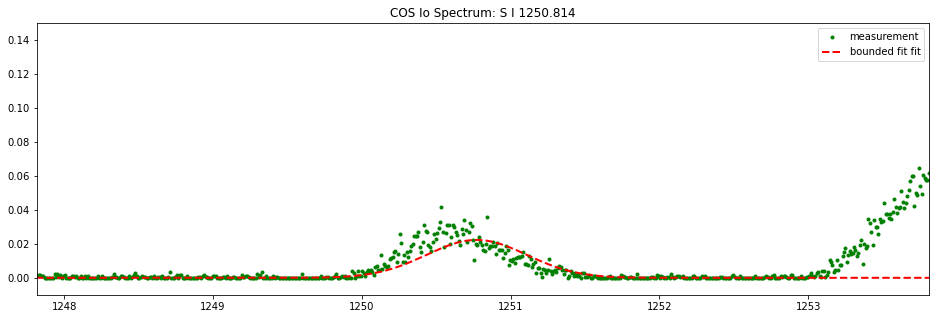

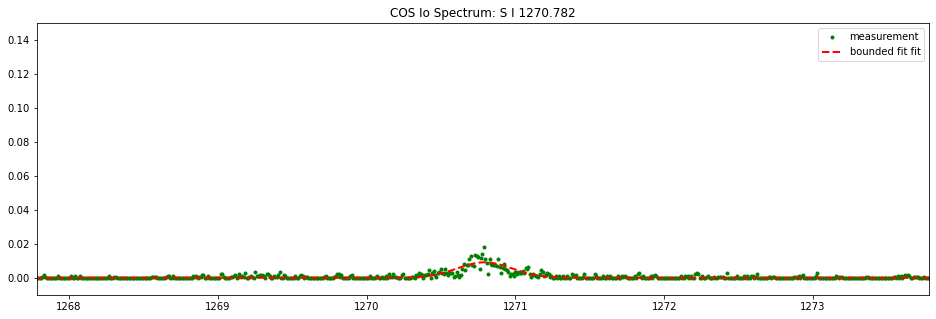

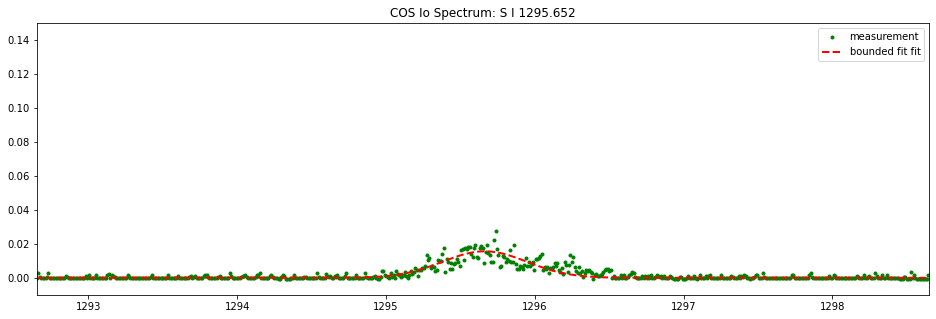

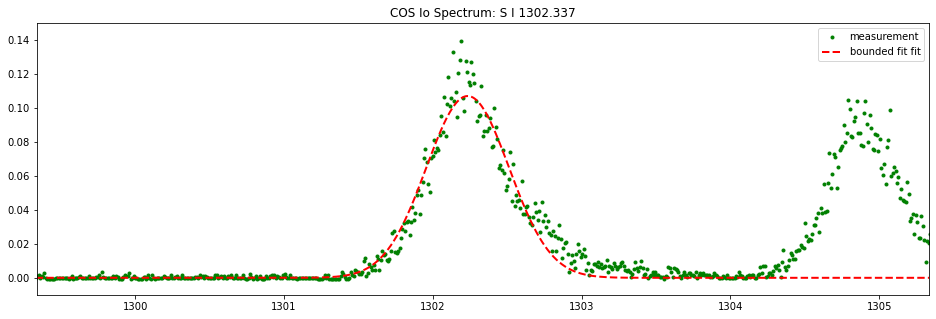

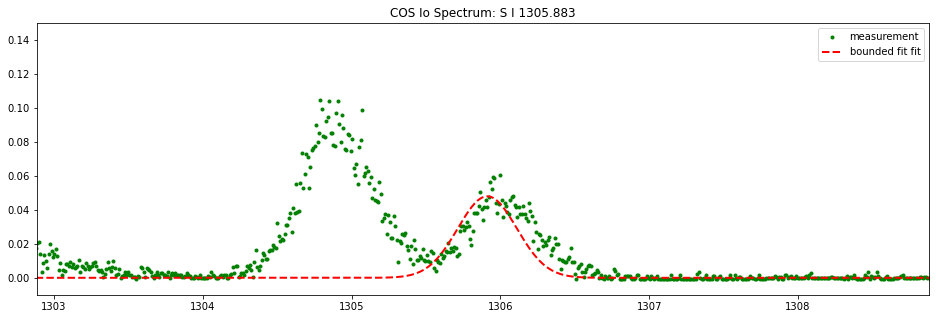

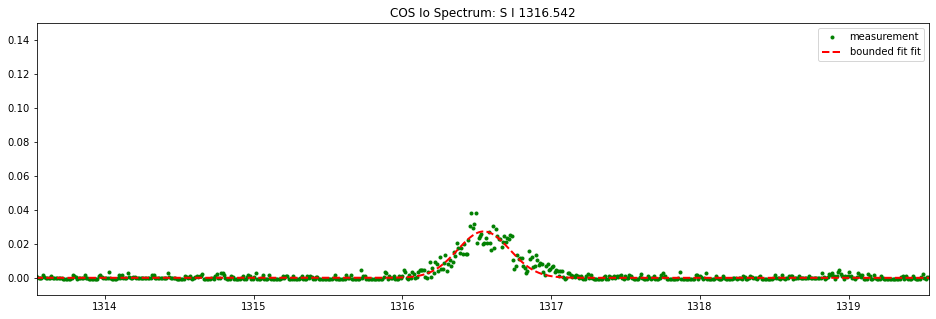

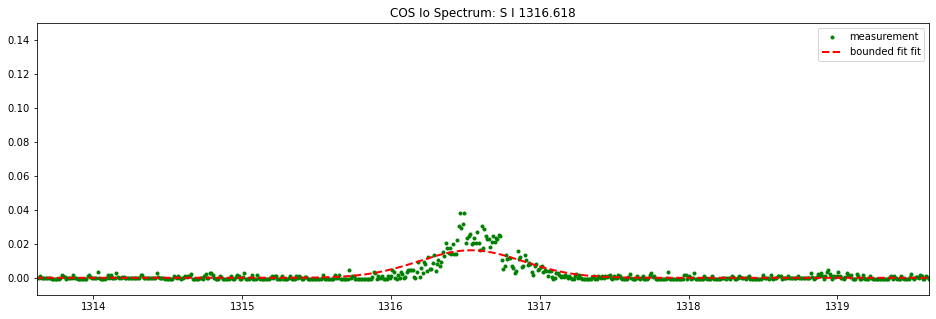

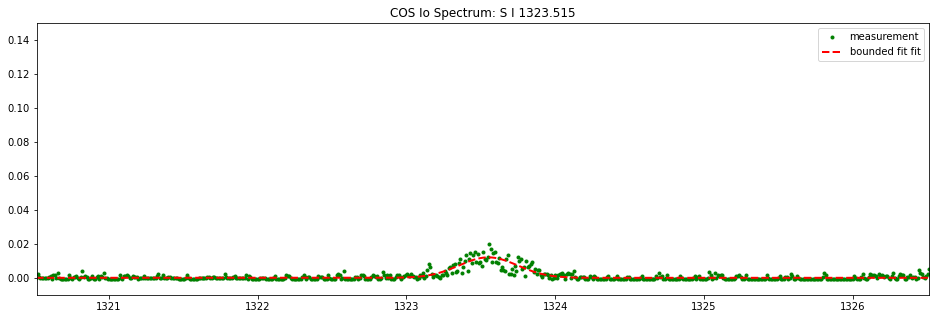

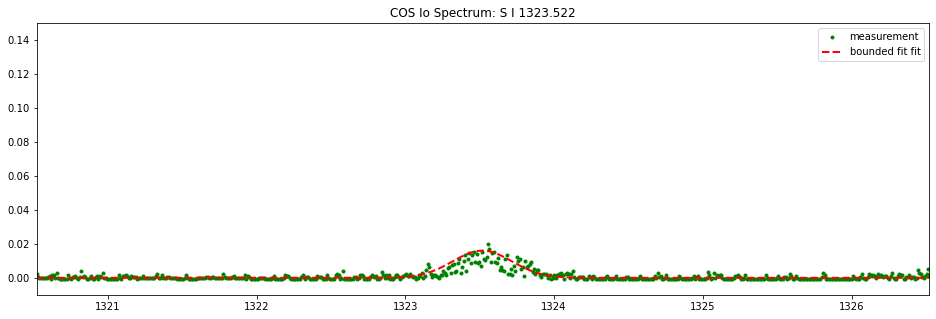

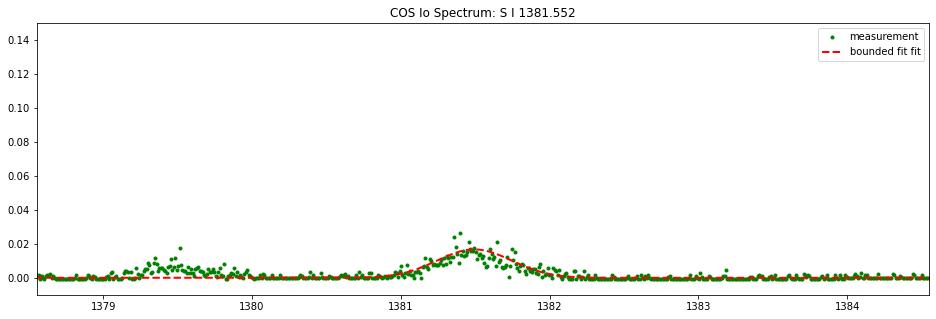

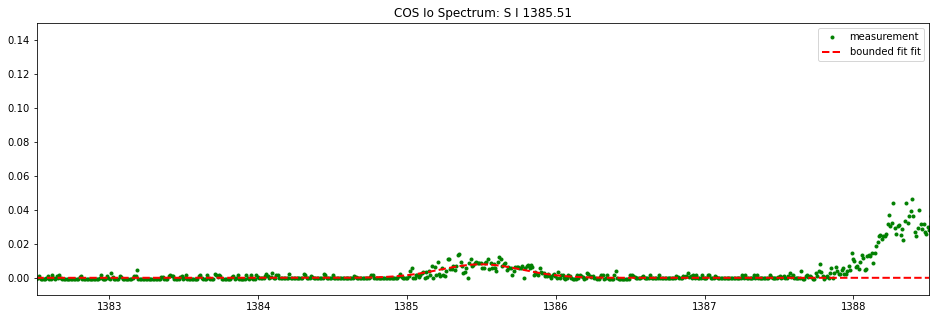

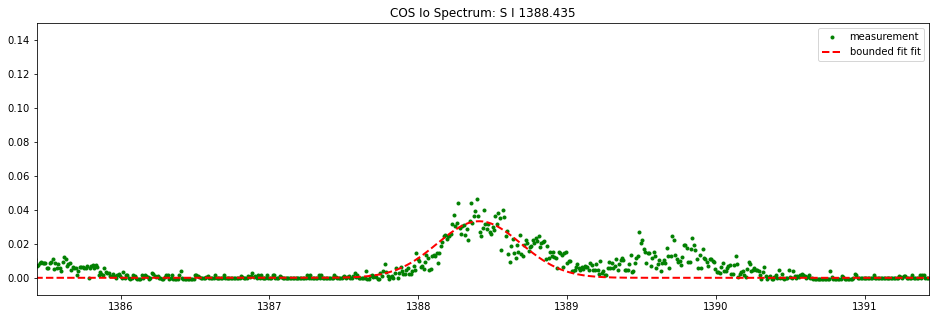

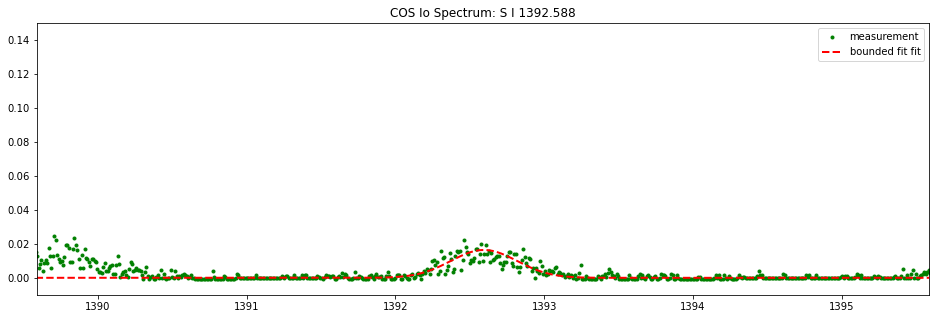

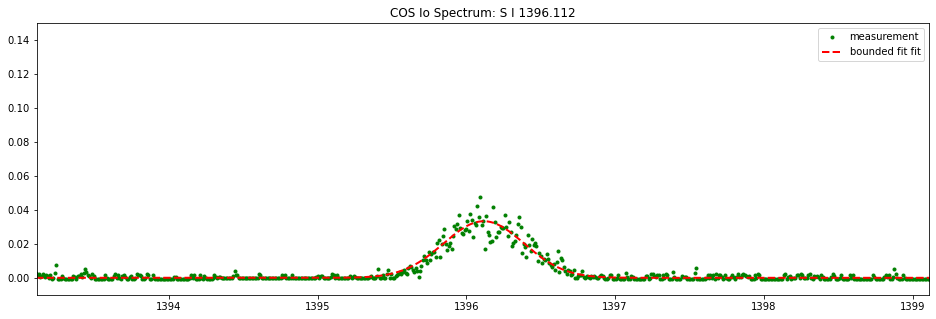

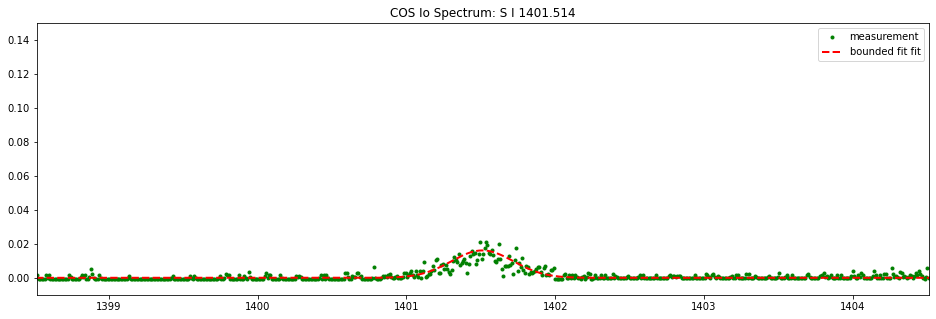

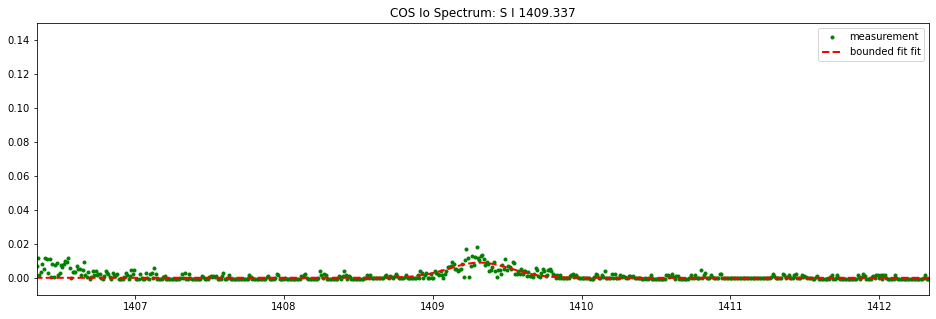

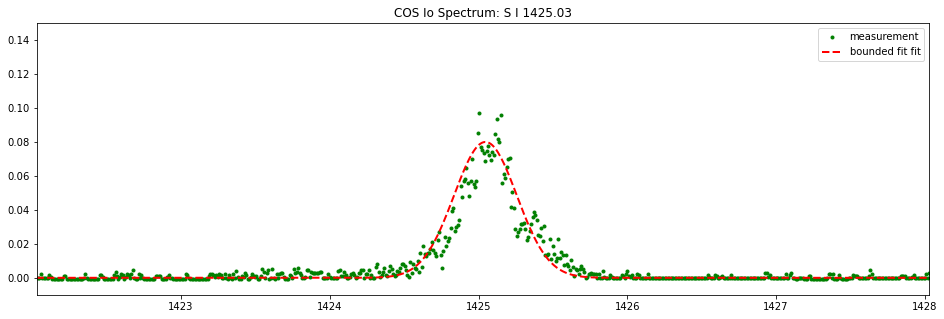

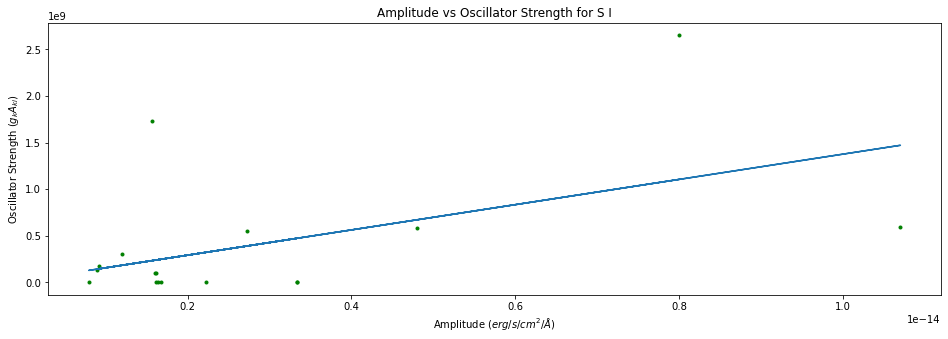

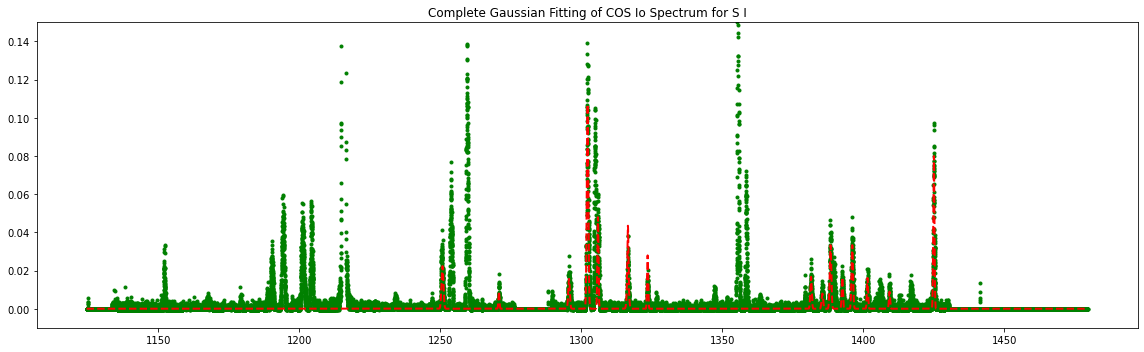

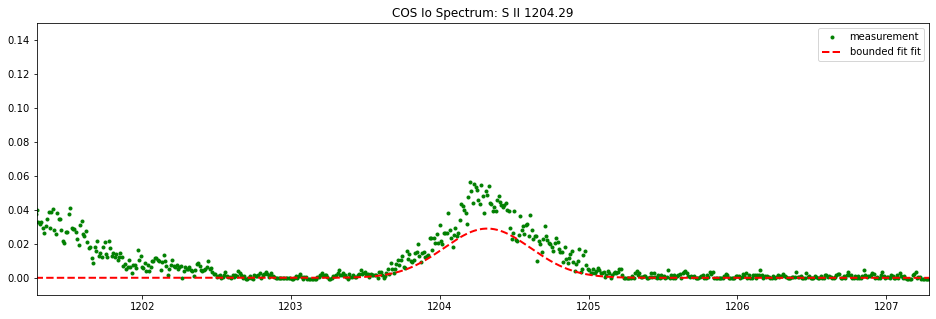

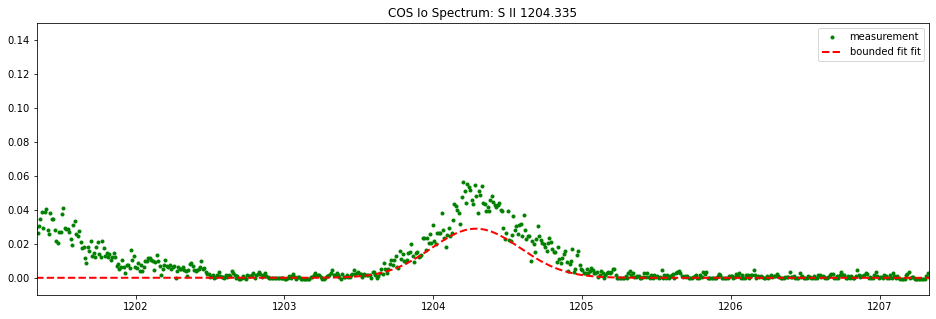

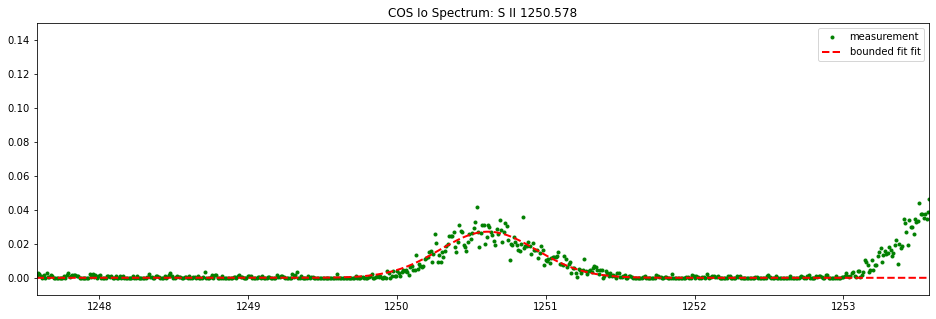

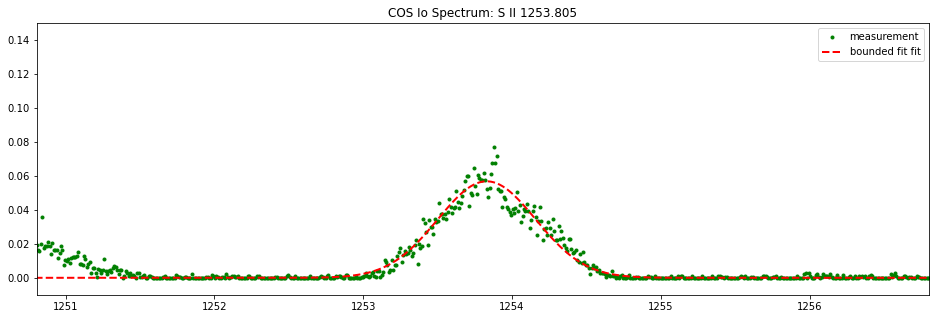

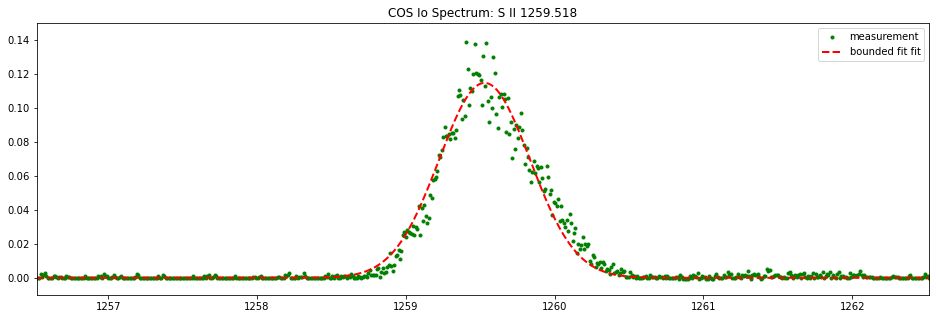

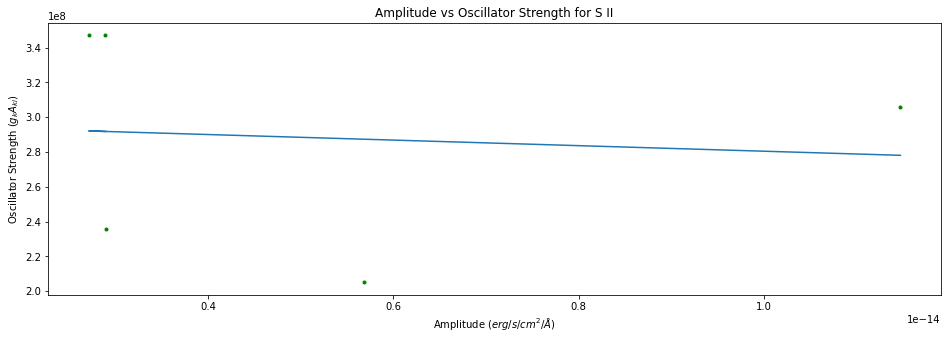

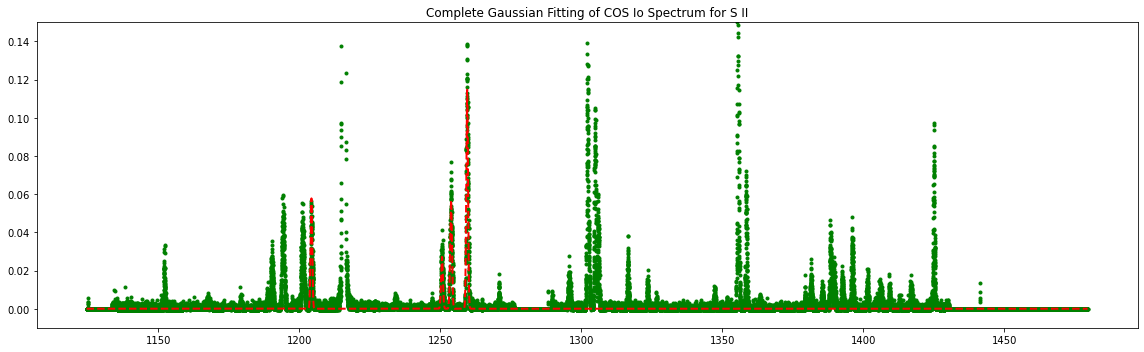

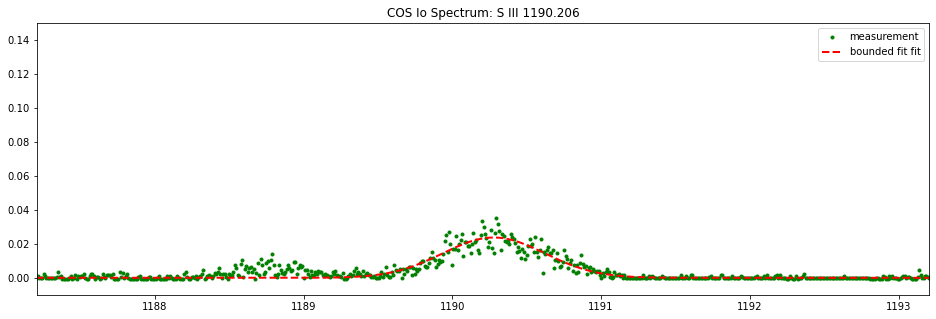

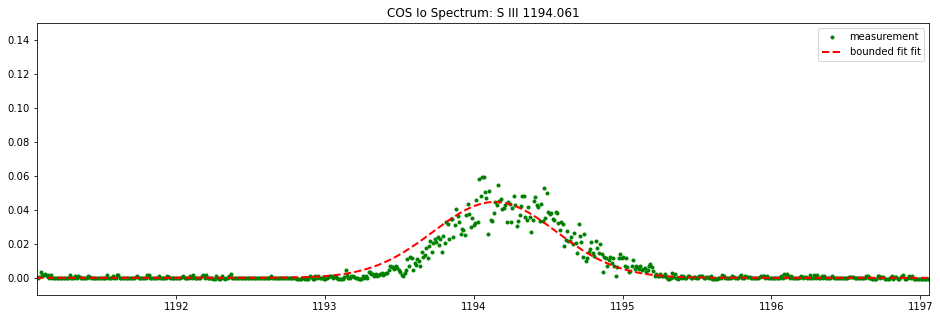

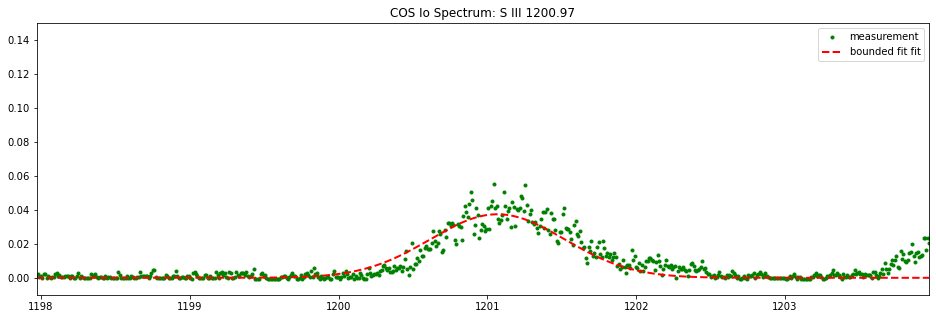

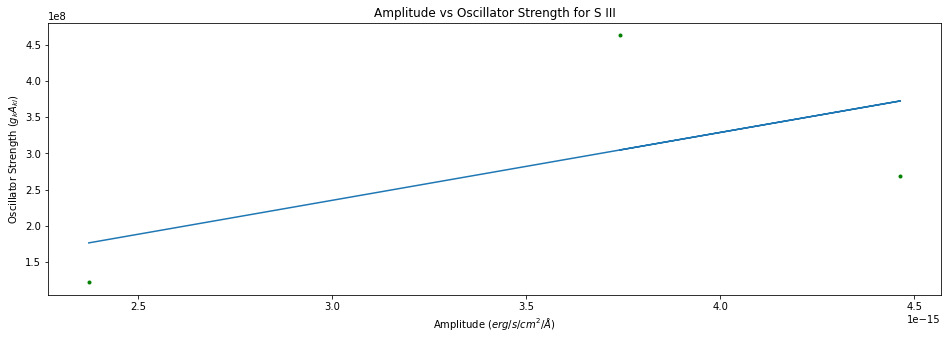

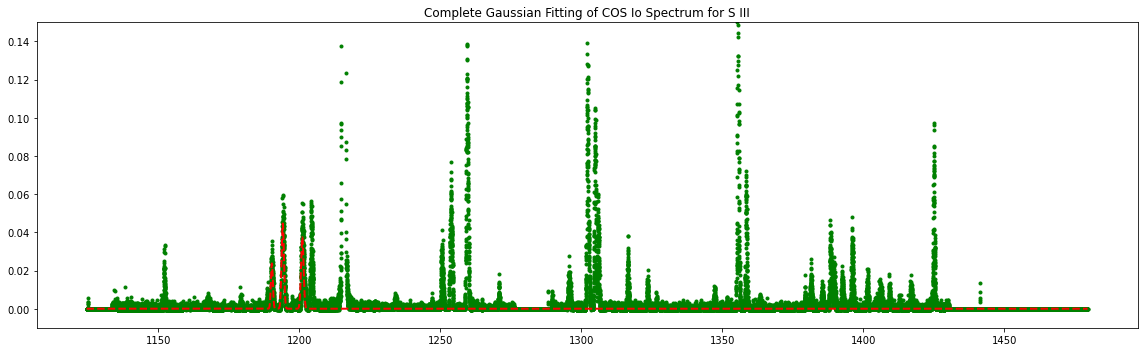

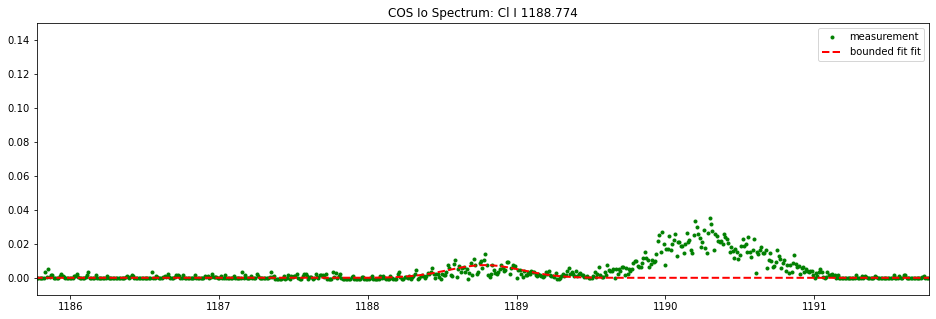

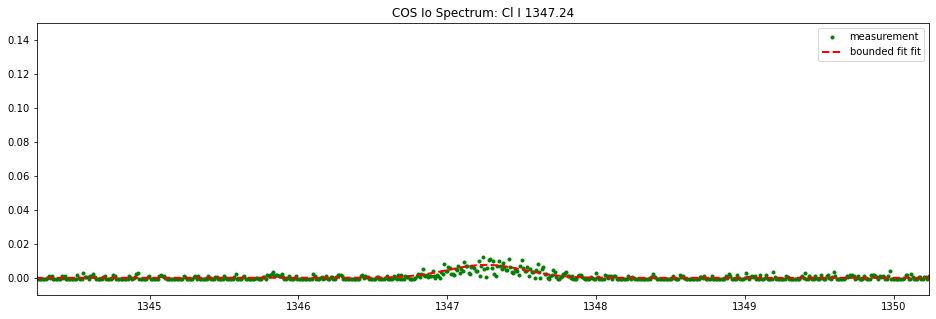

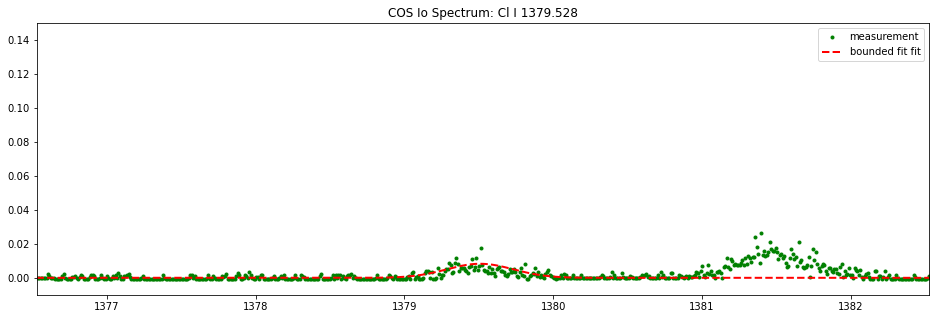

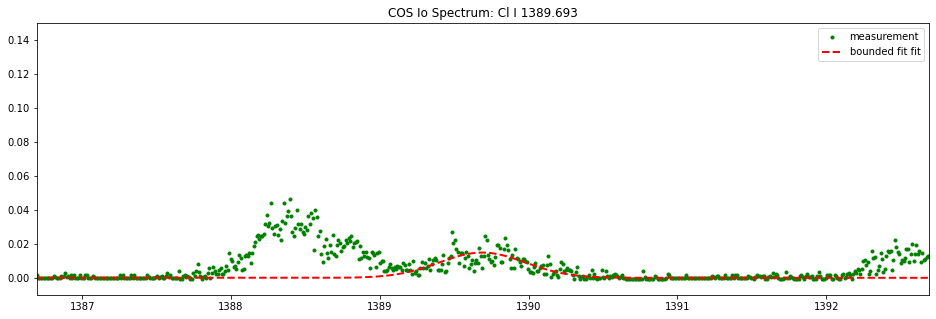

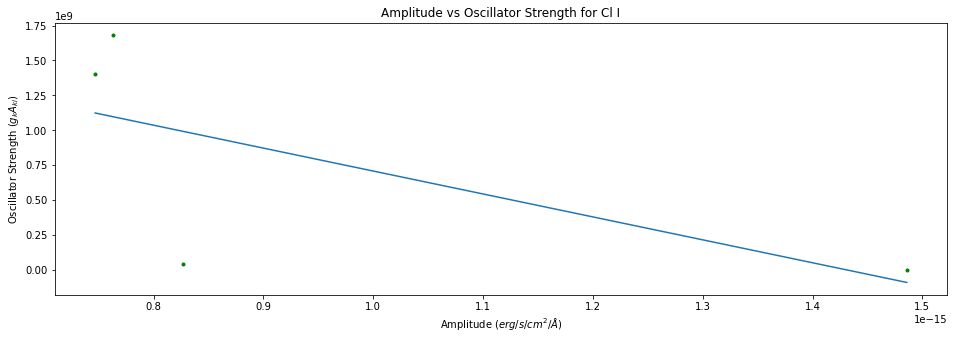

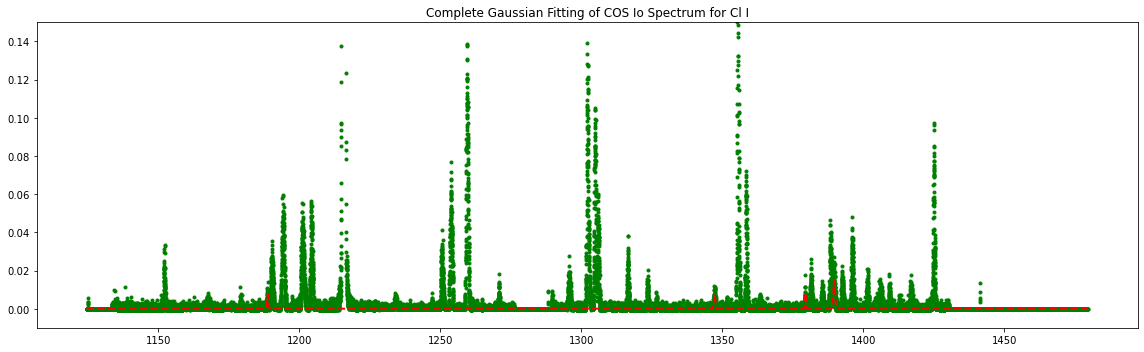

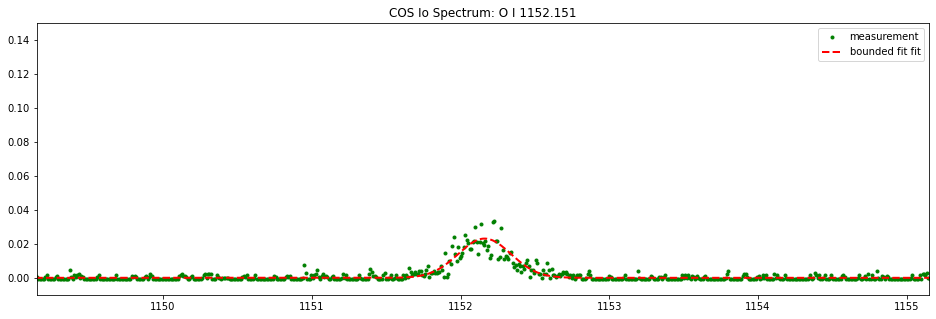

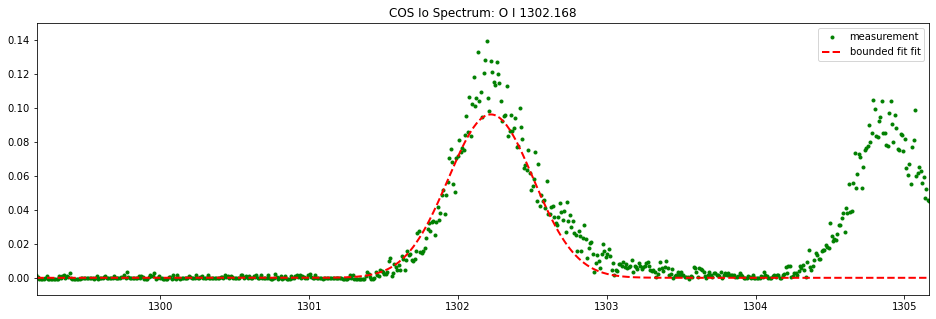

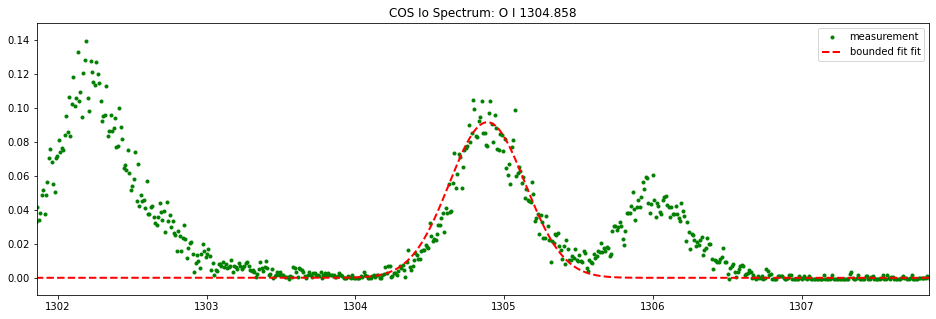

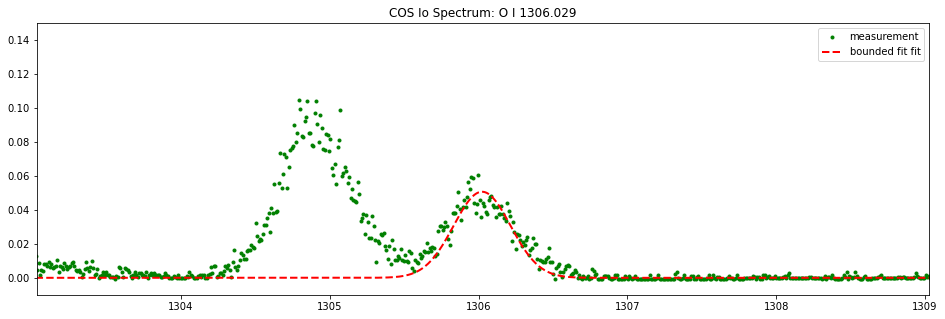

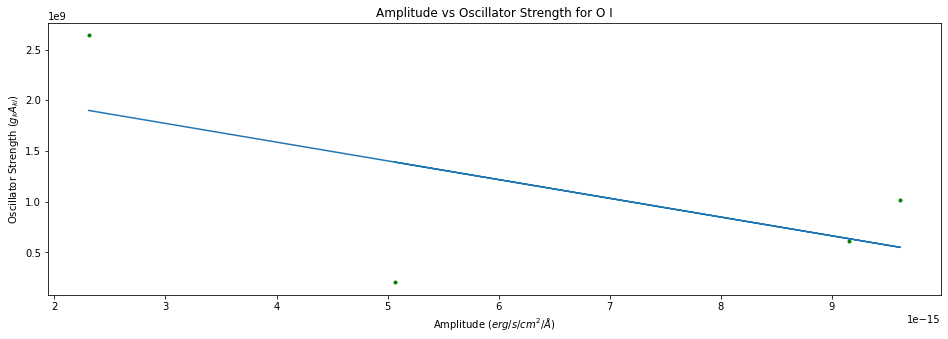

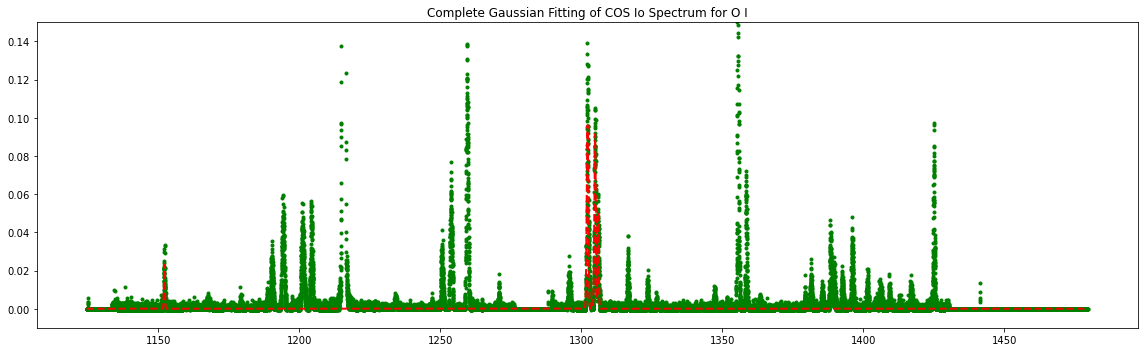

In [287]:
total_params = np.zeros((1,3))
for i in range(0,len(lines)):
    line = lines[i]
    test,array_line = target_array(line)
    params = fit_whole_spectra(test)
    species_plot(line)
    full_plot_per_species()
    total_params = np.vstack((total_params,params))

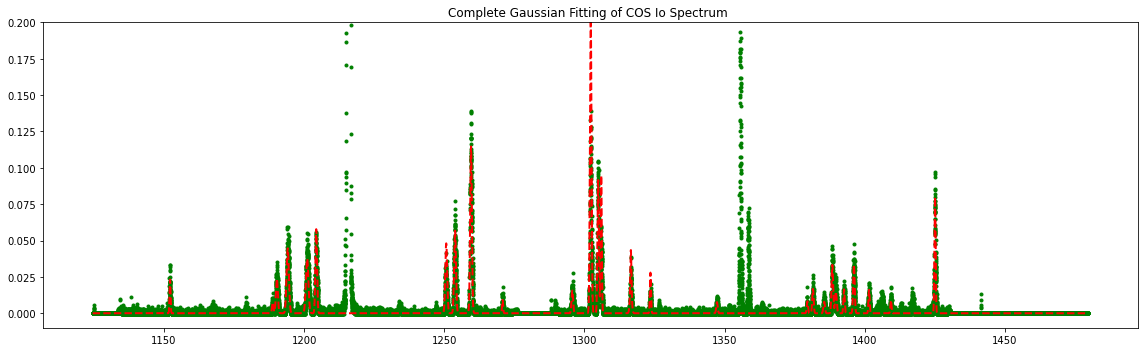

In [288]:
total_spectrum_plot(total_params)

# Checking Individual Lines

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:02<00:00,  6.72it/s]


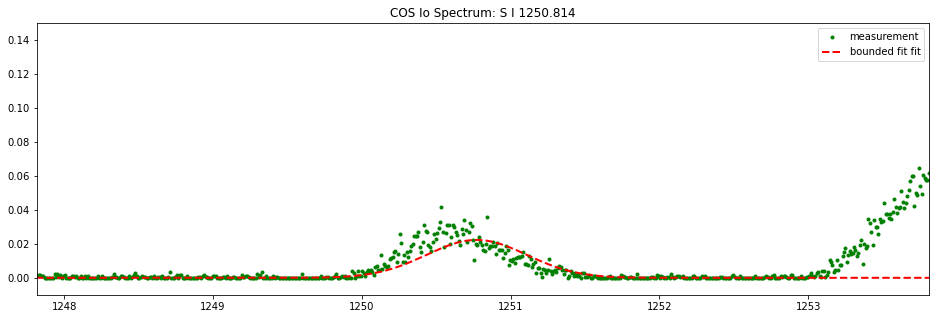

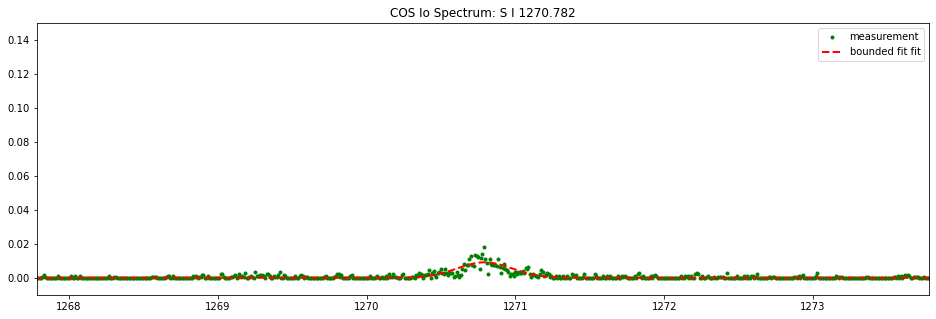

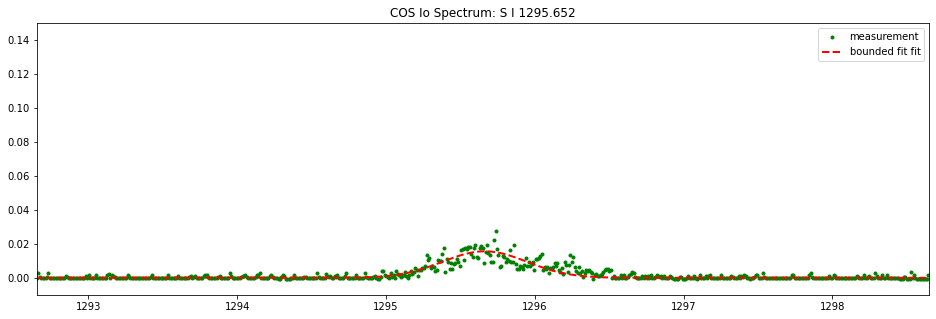

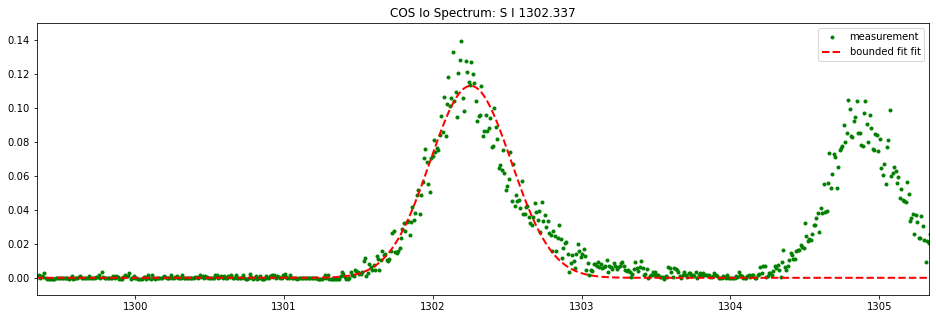

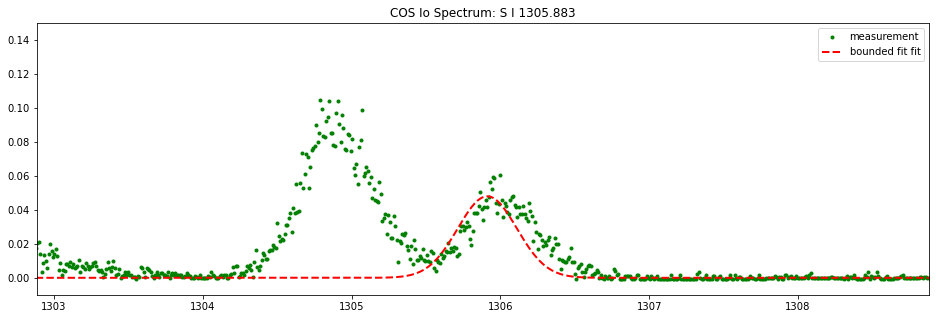

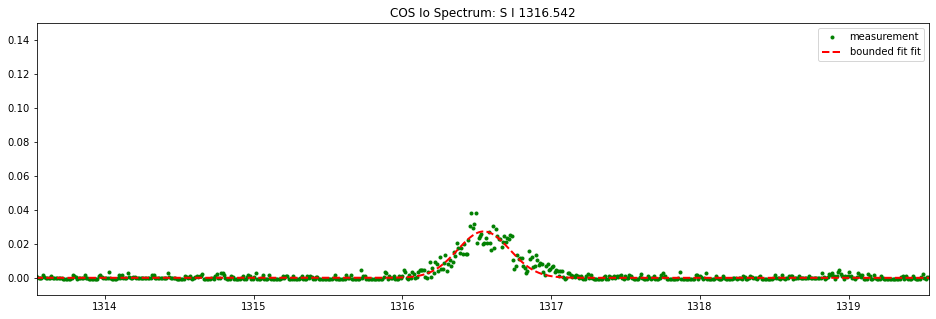

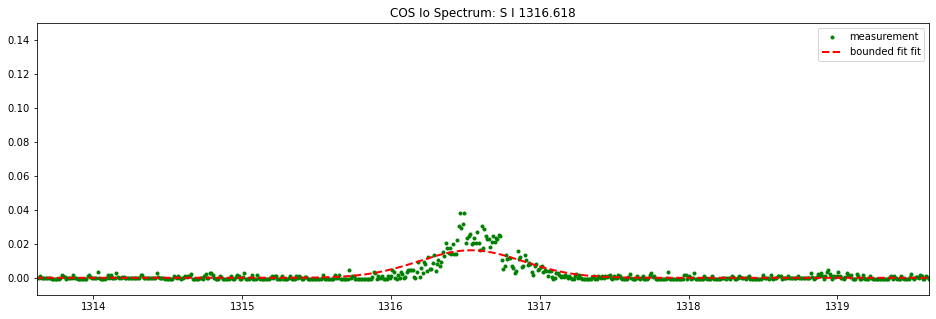

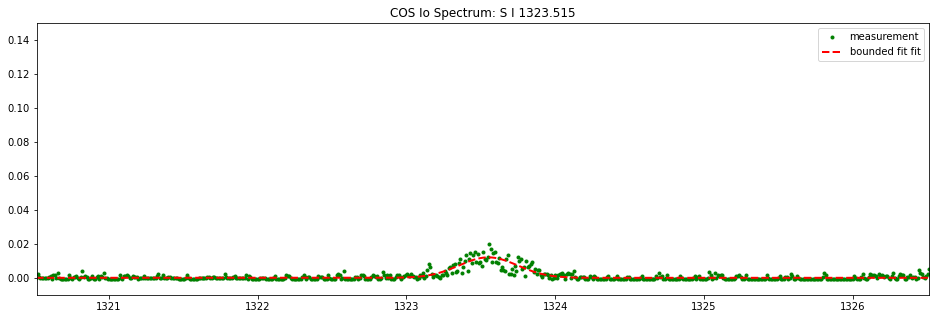

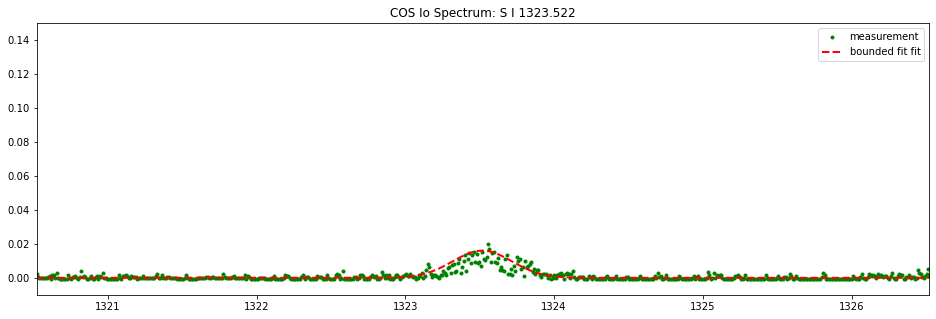

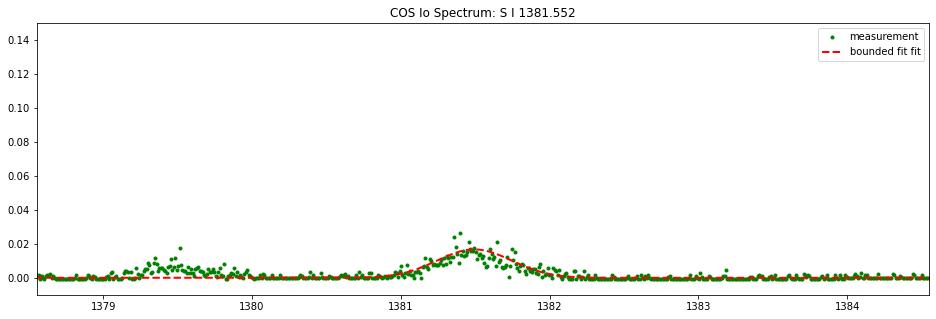

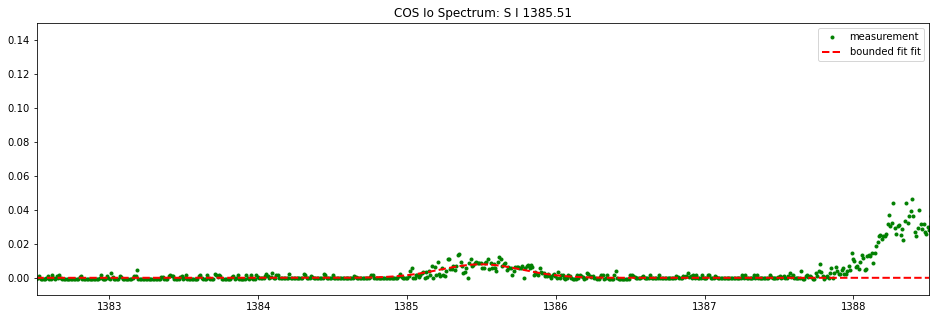

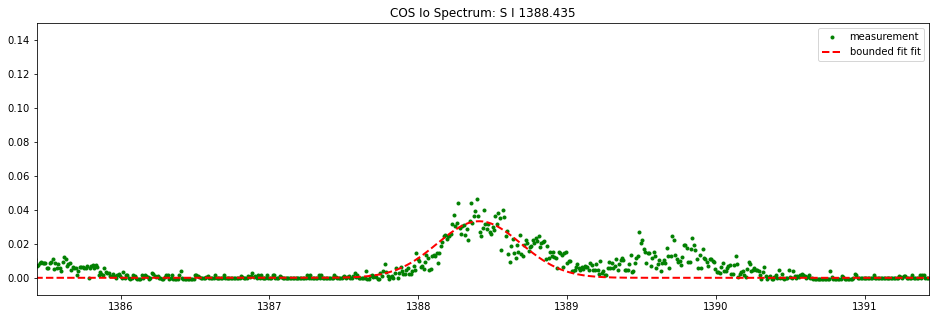

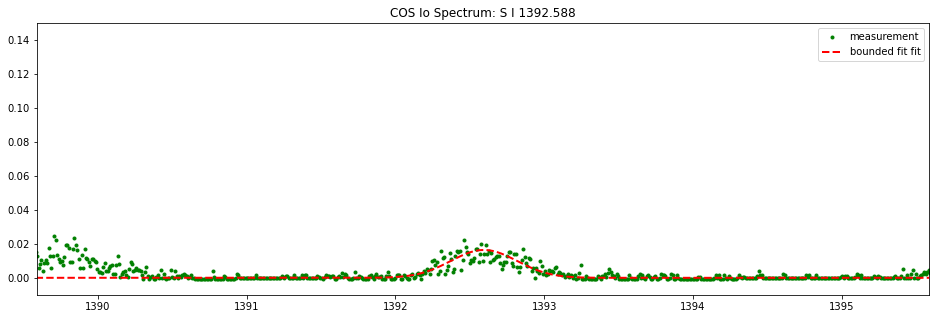

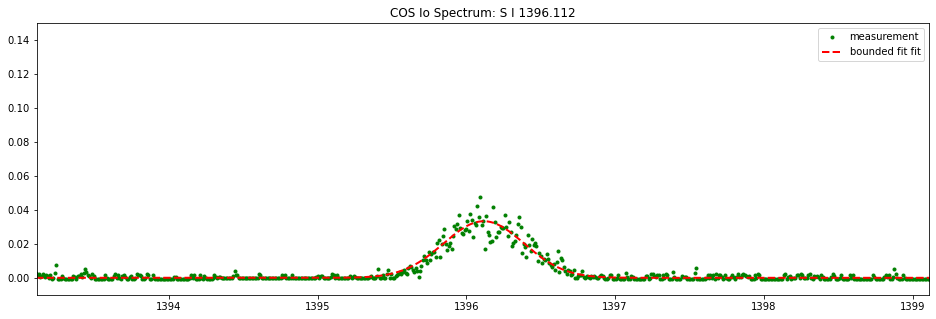

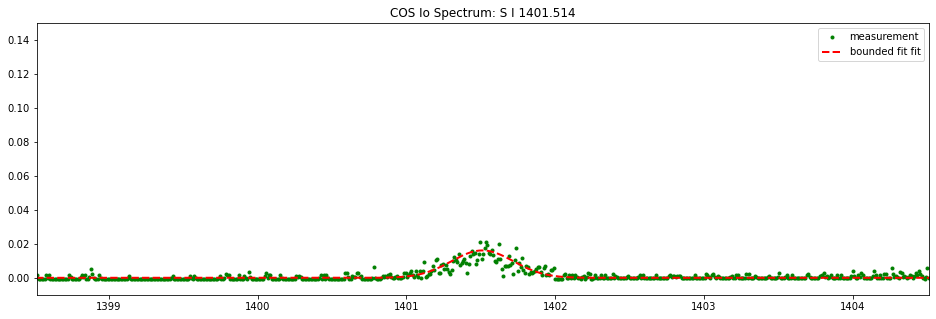

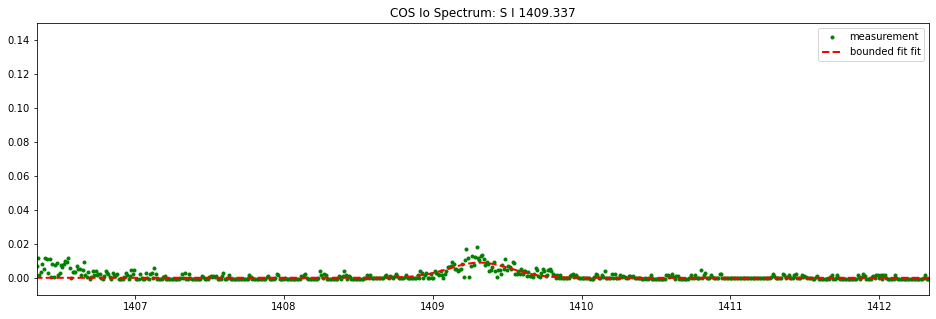

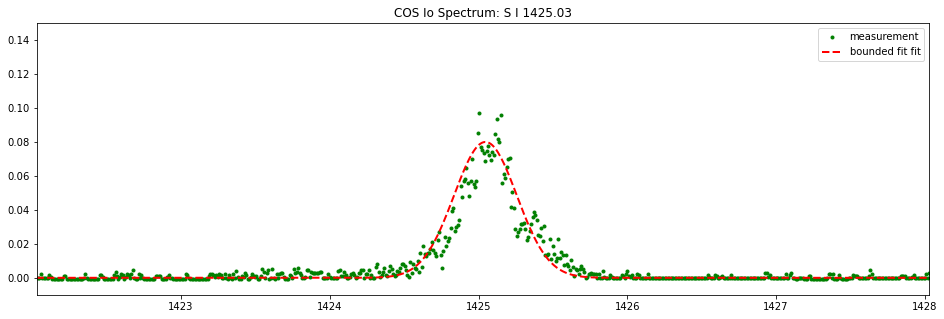

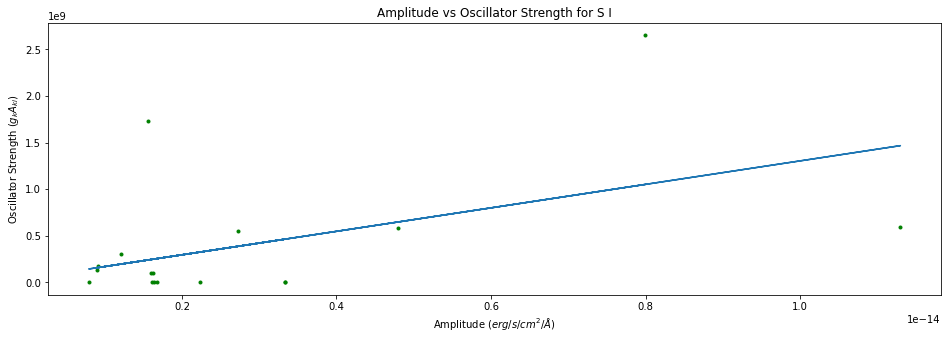

In [176]:
line = 'S I'
test,array_line = target_array(line)
params = fit_whole_spectra(test)
species_plot(line)
#full_plot()

In [177]:
params

array([[1.25077128e+03, 3.36531962e-01, 2.23030610e-02],
       [1.27079251e+03, 1.83614882e-01, 9.12910776e-03],
       [1.29566347e+03, 2.83168244e-01, 1.56192787e-02],
       [1.30225435e+03, 2.72675334e-01, 1.12994263e-01],
       [1.30591206e+03, 1.98485419e-01, 4.79650383e-02],
       [1.31654746e+03, 1.75114162e-01, 2.72959809e-02],
       [1.31653688e+03, 3.48244671e-01, 1.62002112e-02],
       [1.32355127e+03, 1.96395647e-01, 1.20454502e-02],
       [1.32351742e+03, 1.98822842e-01, 1.60067349e-02],
       [1.38149411e+03, 2.50791789e-01, 1.67142036e-02],
       [1.38549715e+03, 2.74692122e-01, 7.93918552e-03],
       [1.38840888e+03, 2.80998384e-01, 3.33038212e-02],
       [1.39259433e+03, 2.22227395e-01, 1.63906448e-02],
       [1.39611739e+03, 2.71070493e-01, 3.33196931e-02],
       [1.40151014e+03, 2.08105335e-01, 1.61194346e-02],
       [1.40931510e+03, 2.07088246e-01, 8.94853401e-03],
       [1.42504643e+03, 2.10882993e-01, 7.99716865e-02]])

In [178]:
total_g = 0
for i in range(0,len(params)):
    total_g = total_g + gaussian(wl, *params[i])

(1311.54746, 1321.54746)

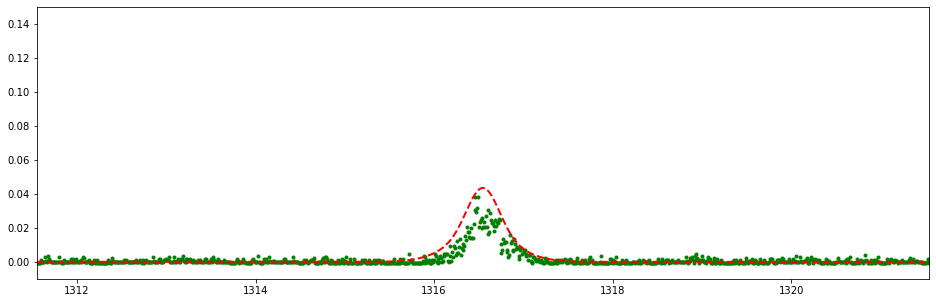

In [179]:
plt.figure(figsize=(16, 5))
plt.plot(wl, flux/10**-13,'g.', label='measurement')
plt.plot(wl, total_g,
            lw=2, c='red', ls='--', label='bounded fit fit')
plt.ylim(-0.01,0.15)
plt.xlim(1.31654746e+03-5,1.31654746e+03+5)